# 1-Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")

df = pd.read_csv('/kaggle/input/python-learning-and-exam-performance-dataset/python_learning_exam_performance.csv') # غير الاسم هنا حسب الملف الحقيقي

print(df.head())
print(df.info())

   student_id  age   country prior_programming_experience  weeks_in_course  \
0           1   54  Pakistan                     Beginner               12   
1           2   44   Nigeria                          NaN               15   
2           3   30     India                 Intermediate                5   
3           4   23   Nigeria                     Beginner                4   
4           5   36        UK                          NaN                3   

   hours_spent_learning_per_week  practice_problems_solved  \
0                           12.2                        60   
1                           14.2                        52   
2                            7.7                        71   
3                            5.6                        64   
4                            3.5                        62   

   projects_completed  tutorial_videos_watched  uses_kaggle  \
0                   1                       24            0   
1                   1           

# 2-EDA & Cleaning

Missing Values:
 age                                     0
country                                 0
prior_programming_experience         1062
weeks_in_course                         0
hours_spent_learning_per_week           0
practice_problems_solved                0
projects_completed                      0
tutorial_videos_watched                 0
uses_kaggle                             0
participates_in_discussion_forums       0
debugging_sessions_per_week             0
self_reported_confidence_python         0
final_exam_score                        0
passed_exam                             0
dtype: int64


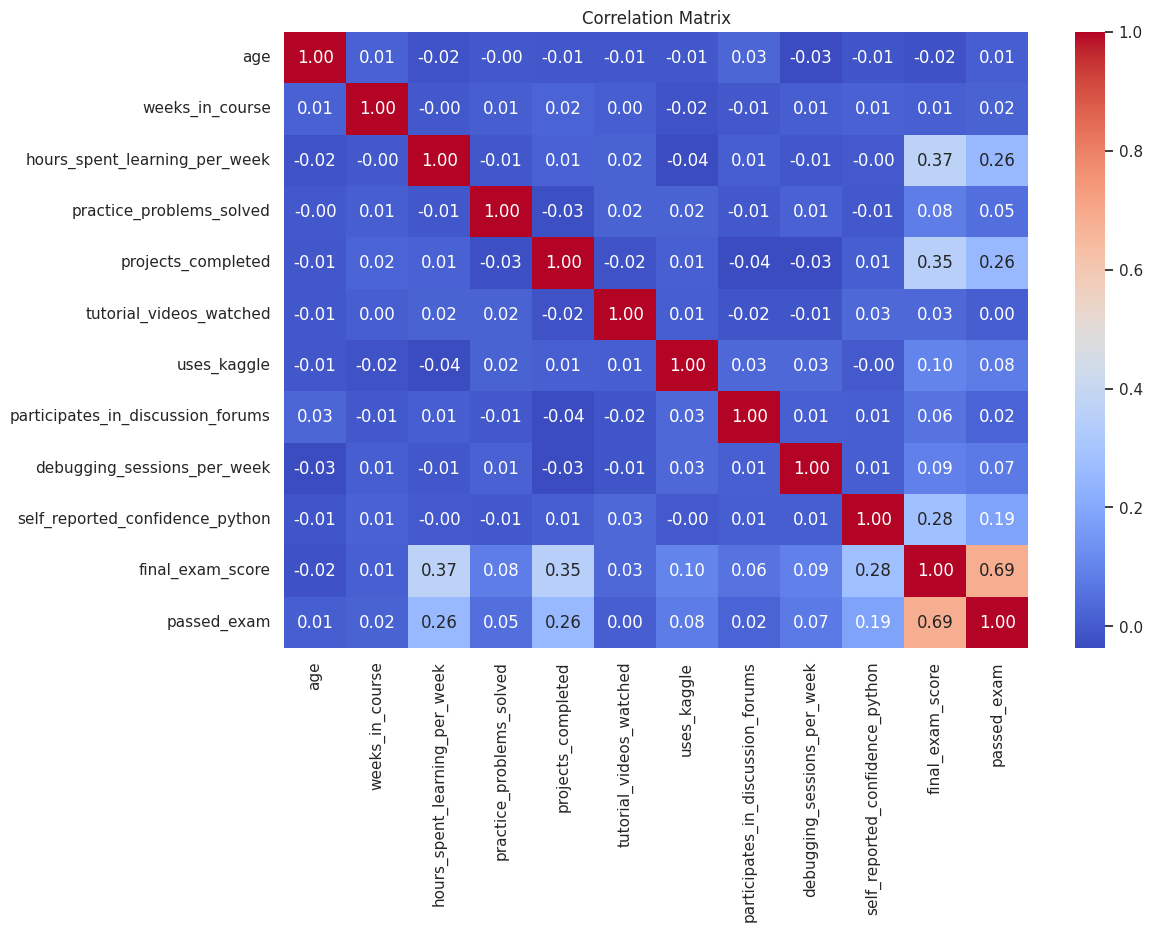

In [2]:
df = df.drop(columns=['student_id'])

print("Missing Values:\n", df.isnull().sum())

plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 3-Preprocessing

In [3]:
experience_map = {
    'None': 0,
    'Beginner': 1,
    'Intermediate': 2,
    'Advanced': 3
}
if 'prior_programming_experience' in df.columns:
    df['prior_programming_experience'] = df['prior_programming_experience'].map(experience_map)
    df['prior_programming_experience'] = df['prior_programming_experience'].fillna(0)

df = pd.get_dummies(df, columns=['country'], drop_first=True)
print(df.head())

   age  prior_programming_experience  weeks_in_course  \
0   54                           1.0               12   
1   44                           0.0               15   
2   30                           2.0                5   
3   23                           1.0                4   
4   36                           0.0                3   

   hours_spent_learning_per_week  practice_problems_solved  \
0                           12.2                        60   
1                           14.2                        52   
2                            7.7                        71   
3                            5.6                        64   
4                            3.5                        62   

   projects_completed  tutorial_videos_watched  uses_kaggle  \
0                   1                       24            0   
1                   1                       32            0   
2                   1                       43            0   
3                   2           

# 4-Regression Model

--- Task 1: Predicting Final Exam Score (Regression) ---
Mean Squared Error: 79.01
R2 Score (Accuracy of Regression): 0.73


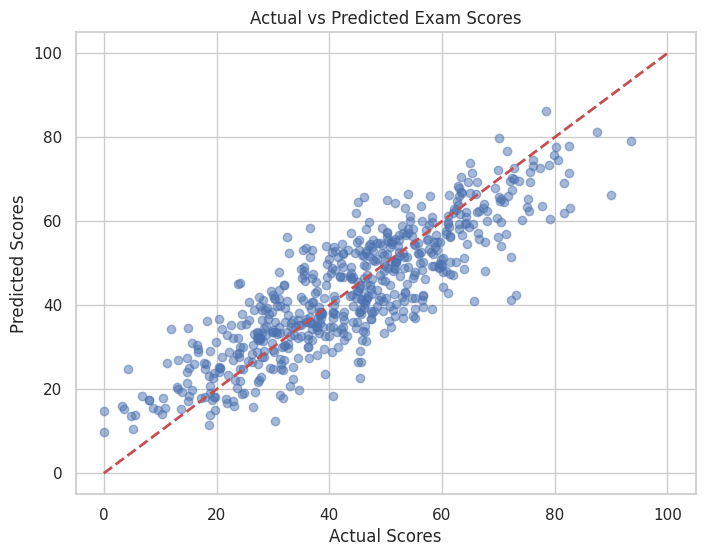

In [4]:
print("--- Task 1: Predicting Final Exam Score (Regression) ---")

X = df.drop(columns=['final_exam_score', 'passed_exam'])
y = df['final_exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score (Accuracy of Regression): {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

# 5-Classification Model

--- Task 2: Predicting Pass/Fail (Classification) ---
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       493
           1       0.90      0.50      0.64       107

    accuracy                           0.90       600
   macro avg       0.90      0.74      0.79       600
weighted avg       0.90      0.90      0.89       600



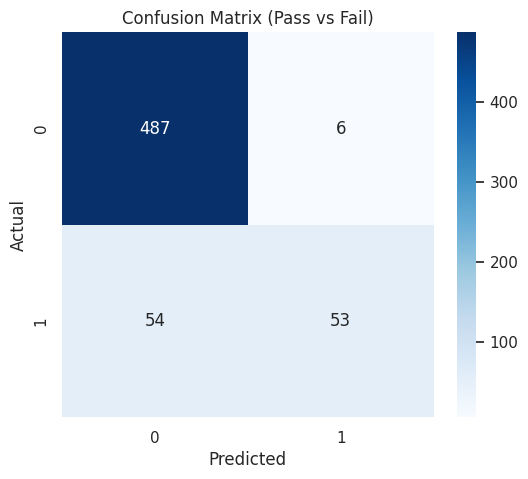

In [5]:
print("--- Task 2: Predicting Pass/Fail (Classification) ---")

X = df.drop(columns=['final_exam_score', 'passed_exam'])
y = df['passed_exam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_train)

y_pred_class = clf_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Pass vs Fail)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6-Feature Importance

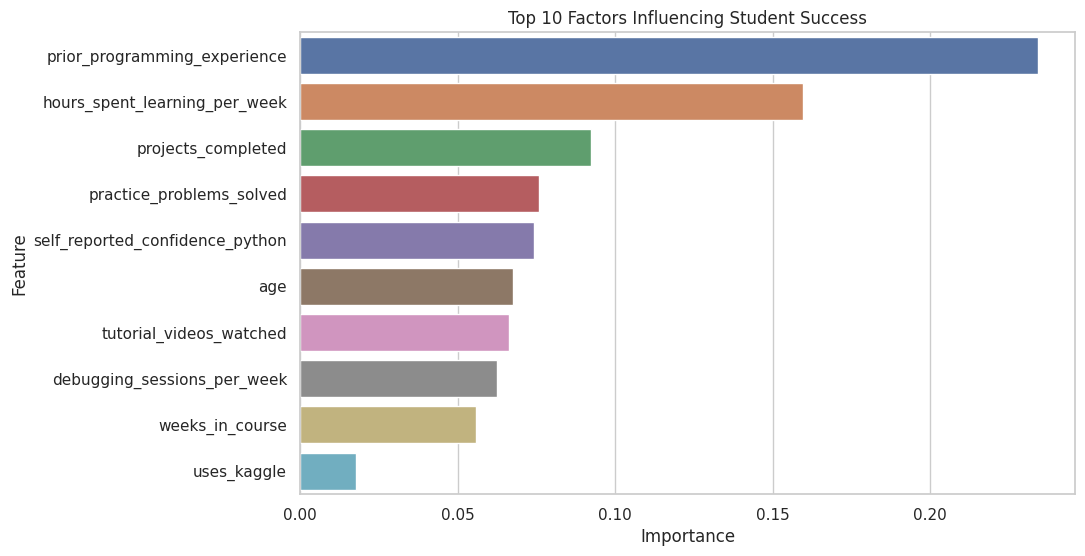

In [6]:
importances = clf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10)) # عرض أهم 10 فقط
plt.title("Top 10 Factors Influencing Student Success")
plt.show()

# 7-The "Effort vs. Outcome" Plot

# 8-The Head Start Effect

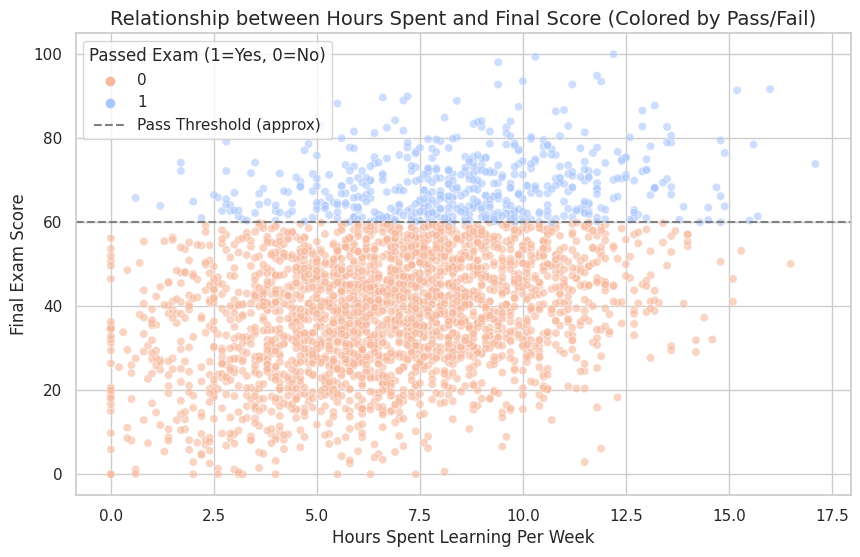

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='hours_spent_learning_per_week',
    y='final_exam_score',
    hue='passed_exam',
    palette='coolwarm_r',
    alpha=0.6  
)

plt.title('Relationship between Hours Spent and Final Score (Colored by Pass/Fail)', fontsize=14)
plt.xlabel('Hours Spent Learning Per Week')
plt.ylabel('Final Exam Score')
plt.axhline(y=60, color='gray', linestyle='--', label='Pass Threshold (approx)') # خط افتراضي لدرجة النجاح
plt.legend(title='Passed Exam (1=Yes, 0=No)')
plt.show()

# 9-Engagement Tools

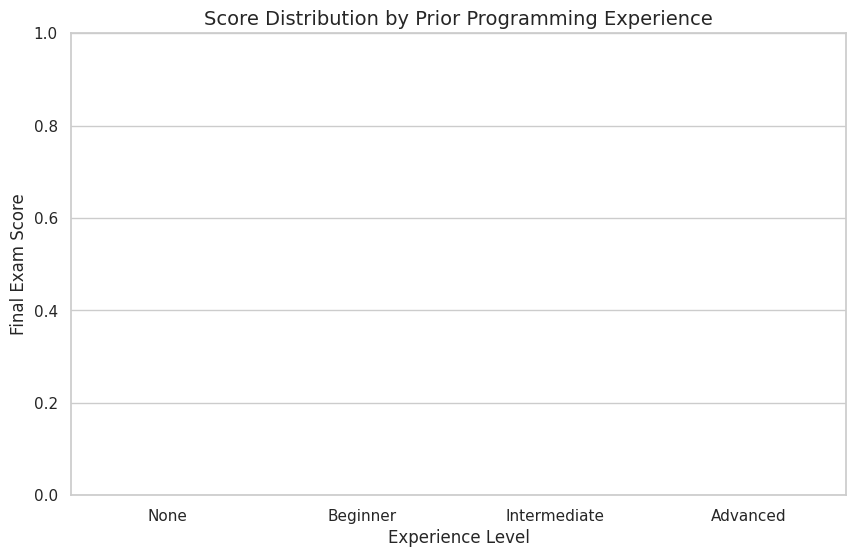

In [8]:
order_list = ['None', 'Beginner', 'Intermediate', 'Advanced']

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='prior_programming_experience',
    y='final_exam_score',
    order=order_list, 
    palette='viridis'
)

plt.title('Score Distribution by Prior Programming Experience', fontsize=14)
plt.xlabel('Experience Level')
plt.ylabel('Final Exam Score')
plt.show()

# 10-Engagement Tools

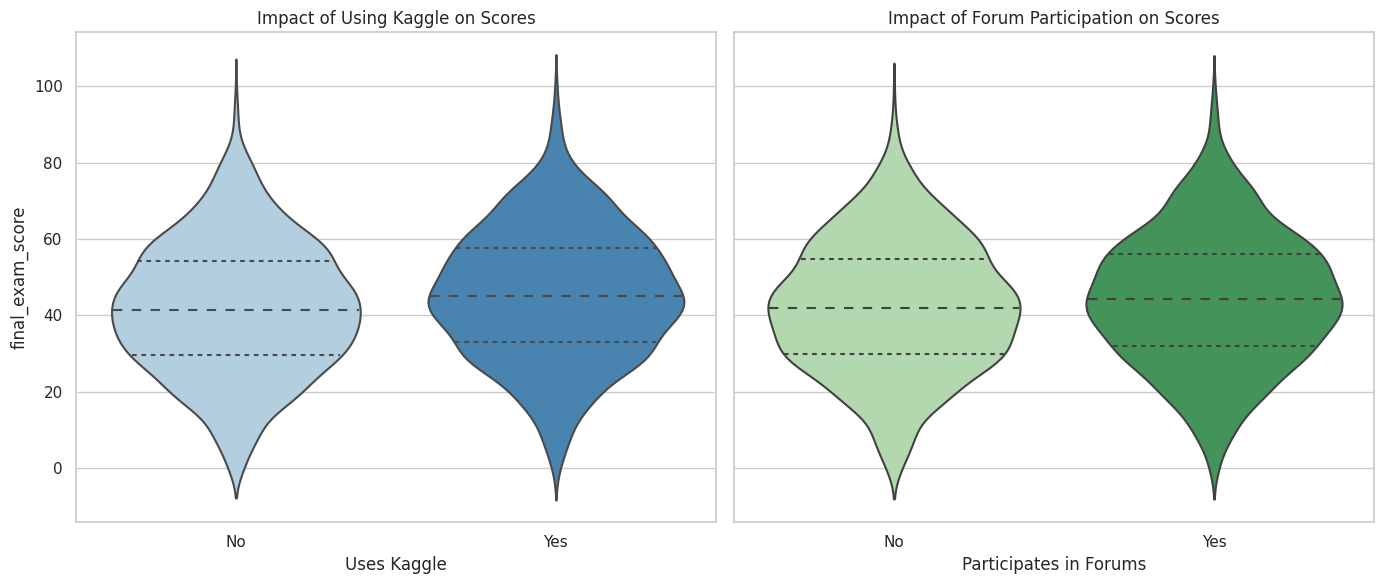

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.violinplot(ax=axes[0], data=df, x='uses_kaggle', y='final_exam_score', palette='Blues', inner="quartile")
axes[0].set_title('Impact of Using Kaggle on Scores')
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].set_xlabel('Uses Kaggle')

sns.violinplot(ax=axes[1], data=df, x='participates_in_discussion_forums', y='final_exam_score', palette='Greens', inner="quartile")
axes[1].set_title('Impact of Forum Participation on Scores')
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].set_xlabel('Participates in Forums')
axes[1].set_ylabel('') 

plt.tight_layout()
plt.show()

# 11-PairPlot of Active Learning

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

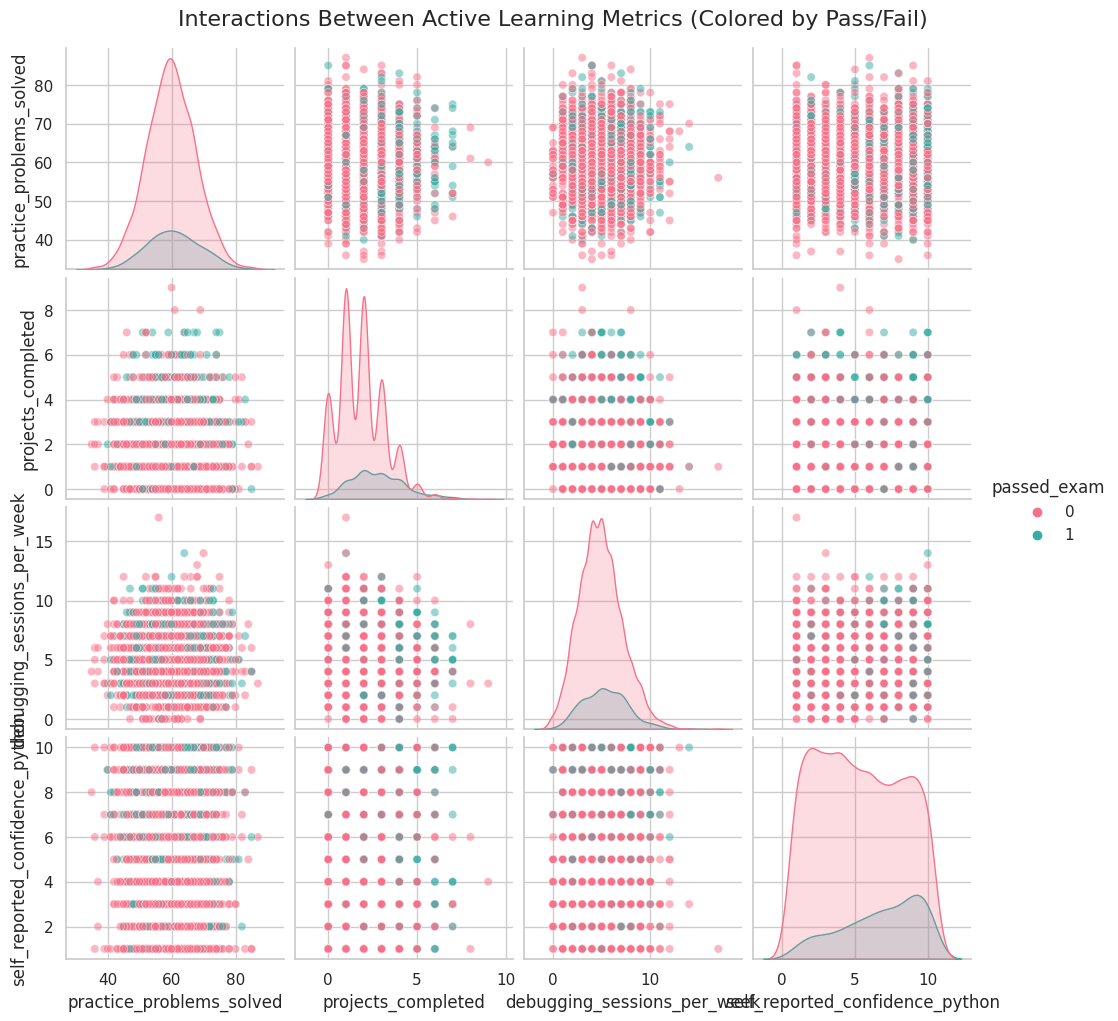

In [10]:
effort_cols = [
    'practice_problems_solved',
    'projects_completed',
    'debugging_sessions_per_week',
    'self_reported_confidence_python',
    'passed_exam' 
]

sns.pairplot(
    df[effort_cols],
    hue='passed_exam', 
    palette='husl',
    diag_kind='kde', 
    plot_kws={'alpha': 0.5} 
)
plt.suptitle('Interactions Between Active Learning Metrics (Colored by Pass/Fail)', y=1.02, fontsize=16)
plt.show()

# [Shenouda Safwat](https://www.linkedin.com/in/shenouda-safwat/)